In [1]:
from manim import *
from numpy import linalg as npl
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline

video_scene = " -v WARNING --progress_bar None --disable_caching moi_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s moi_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.8


In [2]:
# Shift
def shift(t):
    return np.sin(t)*(1 - np.cos(t)), np.cos(t)*(1 - np.cos(t))


# Tilt
def tilt(t):
    return PI/8*(1 - np.cos(t))*np.sin(t), 0, 0

In [49]:
%%capture_video --path "animations/moment_of_inertia/moment_of_inertia_Main.mp4"
%%manim -qk --fps 60 $video_scene

class moi_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # Equations
        # Equations
        moi_eq0 = MathTex(r'\Theta=\sum r_{i\perp}^2\cdot\Delta m_i', font_size = 36).align_on_border(UP + LEFT, buff = 0.5)
        moi_eq1 = MathTex(r'=\int r_{\perp}^2 dm', font_size = 36).next_to(moi_eq0, RIGHT, buff = 0.2)
        moi_eq2 = MathTex(r'=\int_V r_{\perp}^2 dV', font_size = 36).next_to(moi_eq0, RIGHT, buff = 0.2)
        moi_eq3 = MathTex(r'\mathrm{mit}~\varrho=const.=\frac{m}{V}', font_size = 36, color = BLUE).next_to(moi_eq2, 3*RIGHT)     

        box_ri = SurroundingRectangle(moi_eq0[0][3:7], buff = .1, color = RED)
        box_Dm = SurroundingRectangle(moi_eq0[0][8:11], buff = .1, color = RED)

        Dm_eq = MathTex(r'\Delta m_i', color = RED, font_size = 32).move_to([-3.25, -0.1, 0])
        dm_eq = MathTex(r'dm', color = RED, font_size = 32).move_to([-3.25, -0.1, 0])
        dV_eq = MathTex(r'dV', color = BLUE, font_size = 32).move_to([-3.25, -0.1, 0])   

        cone_eq1 = MathTex(r'\Xi:=\{(x, y, z)\in\mathbb{R}:x^2+y^2\leq R^2,\,0\leq z\leq H-2R\}', font_size = 36).align_on_border(LEFT + DOWN).shift(0.5*UP)
        cone_eq2 = Tex(r'$\mathrm{Kegel}$ $\Xi$: Höhe $H$, Radius $R(z)=(H-z)/2$', font_size = 24, color = GREY).align_on_border(LEFT + DOWN)


        # 3D-Coordinate System
        CO3D = [-6, 0, -6]
        ax = ThreeDAxes(
            x_range = (-3, 3, 1), y_range = (-3, 3, 1), z_range = (-2, 5, 1),
            x_length = 6, y_length = 6, z_length = 6, axis_config = {'tip_length': 0.05, 'tip_width': 0.3}, 
            z_axis_config = {'color': WHITE},
            ).move_to(CO3D).rotate(
                axis = [1, 0, 0], angle = 6*PI/4
                ).rotate(
                    axis = [0, 1, 0], angle = 5*PI/4
                    ).rotate(axis = [1, 0, 0], angle = PI/12).rotate(
                        axis = [0, 1, 0], angle = PI/16
                        )

        x_lab = Tex('$x$', font_size = 64).move_to(CO3D).shift(2*DOWN + 2.75*LEFT)
        y_lab = Tex('$y$', font_size = 64).move_to(CO3D).shift(2*DOWN + 2.75*RIGHT)
        z_lab = Tex('$z$', font_size = 64).move_to(CO3D + 0.5*RIGHT).shift(3.3*UP)
        ax_3D = VGroup(ax, x_lab, y_lab, z_lab)


        # Axis of rotation
        def aor(phi, x_shift, y_shift):
            return DashedLine(ax.c2p(2*np.sin(phi) + x_shift, y_shift, -2*np.cos(phi)), ax.c2p(x_shift - 5*np.sin(phi), y_shift, 5*np.cos(phi)), color = RED, stroke_width = 2)  

    
        # Cone
        def cone_circ(z):
            r = (4 - z) / 2
            return ax.plot_parametric_curve(lambda phi: np.array([r*np.cos(phi), r*np.sin(phi), z]), t_range = [0, 2*PI], stroke_opacity = 0.25, color = GREY)

        
        # Mass-Elements
        cc1 = (-3/2, 1/2, 0.5)
        cc2 = (1, 0, 1.5)

        ax_aor = aor(0, 0, 0)
        cone_circ_list = [cone_circ(z) for z in np.arange(0, 4.01, 0.1)]

        ax_cc1 = Cube(side_length = 0.125, fill_opacity = 0, color = RED, stroke_width = 1).rotate(
                    axis = [1, 0, 0], angle = 6*PI/4
                    ).rotate(
                        axis = [0, 1, 0], angle = 5*PI/4
                        ).rotate(axis = [1, 0, 0], angle = PI/12).rotate(
                            axis = [0, 1, 0], angle = PI/16
                            ).move_to(ax.c2p(cc1[0], cc1[1], cc1[2]))

        ax_cc1_proj = Line(start = ax.c2p(cc1[0], cc1[1], cc1[2]), end = ax_aor.get_projection(ax_cc1.get_center()), color = RED, stroke_width = 1)

        ax_cc2 = Cube(side_length = 0.125, fill_opacity = 0, color = RED, stroke_width = 1).rotate(
            axis = [1, 0, 0], angle = 6*PI/4
            ).rotate(
                axis = [0, 1, 0], angle = 5*PI/4
                ).rotate(axis = [1, 0, 0], angle = PI/12).rotate(
                    axis = [0, 1, 0], angle = PI/16
                    ).move_to(ax.c2p(cc2[0], cc2[1], cc2[2]))

        ax_cc2_proj = Line(start = ax.c2p(cc2[0], cc2[1], cc2[2]), end = ax_aor.get_projection(ax_cc2.get_center()), color = RED, stroke_width = 1)


        # 2D-Coordinate Systems
        ax1 = Axes(x_range = [-3, 3, 1], y_range = [-3, 3, 1], x_length = 6, y_length = 6, axis_config = {"stroke_opacity": 0.5}).move_to([4.5, -0.5, 0]).scale(0.5).set_opacity(0.5)
        ax1_head = Text('(b) Verschiebung (SvS)', font_size = 24).move_to([4.5, 2, 0])
        ax1_head_half = Text('(b) Verschiebung (SvS)', font_size = 24).move_to([4.5, 2, 0]).set_opacity(0.5)

        ax1_x_lab = ax1.get_x_axis_label('x').set_opacity(0.5)
        ax1_y_lab = ax1.get_y_axis_label('y').set_opacity(0.5)

        ax2 = Axes(x_range = [-3, 3, 1], y_range = [-1, 5, 1], x_length = 6, y_length = 6, axis_config = {"stroke_opacity": 0.5}).move_to([0.5, -0.5, 0]).scale(0.5).set_opacity(0.5)
        ax2_head = Text('(a) Kippen', font_size = 24).move_to([0, 2, 0])
        ax2_head_half = Text('(a) Kippen', font_size = 24).move_to([0, 2, 0]).set_opacity(0.5)
        ax2_x_lab = ax2.get_x_axis_label('x').set_opacity(0.5)
        ax2_y_lab = ax2.get_y_axis_label('z').set_opacity(0.5)
                      

        def aor1(x_shift, y_shift):
            circ = Circle(radius = 0.125, color = RED, stroke_width = 2)
            dot = Dot(radius = 0.05, color = RED)
            return VGroup(circ, dot).move_to(ax1.c2p(x_shift, y_shift, 1))

        ax1_aor = aor1(0, 0)
        ax1_cone = Circle.from_three_points(ax1.c2p(-2, 0, 0), ax1.c2p(0, 2, 0), ax1.c2p(2, 0, 0), color = GREY, stroke_opacity = 0.5)
        ax1_cc1 = Square(side_length = 0.125, stroke_color = RED, stroke_width = 2).move_to(ax1.c2p(cc1[0], cc1[1], 0))
        ax1_cc1_proj = Line(start = ax1.c2p(cc1[0], cc1[1], 0), end = ax1_aor.get_center(), color = RED, stroke_width = 1) 
        ax1_cc2 = Square(side_length = 0.125, stroke_color = RED, stroke_width = 2).move_to(ax1.c2p(cc2[0], cc2[1], 0))
        ax1_cc2_proj = Line(start = ax1.c2p(cc2[0], cc2[1], 0), end = ax1_aor.get_center(), color = RED, stroke_width = 1)

        def aor2(phi, x_shift):
            return DashedLine(ax2.c2p(np.sin(phi) + x_shift, -np.cos(phi), 1), ax2.c2p(x_shift - 5*np.sin(phi), 5*np.cos(phi), 1), color = RED, stroke_width = 1)

        ax2_aor = aor2(0, 0)
        ax2_cone = Polygon(ax2.c2p(-2, 0, 0), ax2.c2p(0, 4, 0), ax2.c2p(2, 0, 0), color = GREY, stroke_opacity = 0.5)
        ax2_cc1 = Square(side_length = 0.125, stroke_color = RED, stroke_width = 2).move_to(ax2.c2p(cc1[0], cc1[2], 0))
        ax2_cc1_proj = Line(start = ax2.c2p(cc1[0], cc1[2], 0), end = ax2_aor.get_projection(ax2_cc1.get_center()), color = RED, stroke_width = 1) 
        ax2_cc2 = Square(side_length = 0.125, stroke_color = RED, stroke_width = 2).move_to(ax2.c2p(cc2[0], cc2[2], 0))
        ax2_cc2_proj = Line(start = ax2.c2p(cc2[0], cc2[2], 0), end = ax2_aor.get_projection(ax2_cc2.get_center()), color = RED, stroke_width = 1) 

        ax1_group = VGroup(ax1, ax1_x_lab, ax1_y_lab, ax1_cc1_proj, ax1_cc2_proj, ax1_cone, ax1_aor, ax1_cc1, ax1_cc2)
        ax2_group = VGroup(ax2, ax2_x_lab, ax2_y_lab, ax2_cc1_proj, ax2_cc2_proj, ax2_cone, ax2_aor, ax2_cc1, ax2_cc2)



        # 3D-Tilt
        def ax_aor_tilt(axis):
            t = tilt_t.get_value()
            axis.become(aor(tilt(t)[0], 0, 0))

        def ax_cc1_proj_tilt(projection):
            t = tilt_t.get_value()
            projection.become(Line(start = ax.c2p(cc1[0], cc1[1], cc1[2]), end = ax_aor.get_projection(ax_cc1.get_center()), color = RED, stroke_width = 1))

        def ax_cc2_proj_tilt(projection):
            t = tilt_t.get_value()
            projection.become(Line(start = ax.c2p(cc2[0], cc2[1], cc2[2]), end = ax_aor.get_projection(ax_cc2.get_center()), color = RED, stroke_width = 1))

        # 3D-Shift
        def ax_aor_shift(axis):
            s = shift_t.get_value()
            axis.become(aor(0, shift(s)[0], shift(s)[1]))

        def ax_cc1_proj_shift(projection):
            s = shift_t.get_value()
            projection.become(Line(start = ax.c2p(cc1[0], cc1[1], cc1[2]), end = ax_aor.get_projection(ax_cc1.get_center()), color = RED, stroke_width = 1))

        def ax_cc2_proj_shift(projection):
            s = shift_t.get_value()
            projection.become(Line(start = ax.c2p(cc2[0], cc2[1], cc2[2]), end = ax_aor.get_projection(ax_cc2.get_center()), color = RED, stroke_width = 1))


        # 2D-Tilt
        def ax2_aor_tilt(axis):
            t = tilt_t.get_value()
            axis.become(aor2(tilt(t)[0], 0))

        def ax2_cc1_proj_tilt(projection):
            t = tilt_t.get_value()
            projection.become(Line(start = ax2.c2p(cc1[0], cc1[2], 0), end = ax2_aor.get_projection(ax2_cc1.get_center()), color = RED, stroke_width = 1))

        def ax2_cc2_proj_tilt(projection):
            t = tilt_t.get_value()
            projection.become(Line(start = ax2.c2p(cc2[0], cc2[2], 0), end = ax2_aor.get_projection(ax2_cc2.get_center()), color = RED, stroke_width = 1))

        # 2D-Shift
        def ax1_aor_shift(axis):
            s = shift_t.get_value()
            axis.become(aor1(shift(s)[0], shift(s)[1]))

        def ax1_cc1_proj_shift(projection):
            s = shift_t.get_value()
            projection.become(Line(start = ax1.c2p(cc1[0], cc1[1], 0), end = ax1_aor.get_center(), color = RED, stroke_width = 1))

        def ax1_cc2_proj_shift(projection):
            s = shift_t.get_value()
            projection.become(Line(start = ax1.c2p(cc2[0], cc2[1], 0), end = ax1_aor.get_center(), color = RED, stroke_width = 1))


########## Intro ##########  

        # self.play(Write(cone_eq1), run_time = 1.5)
        # self.play(FadeIn(ax_3D), run_time = 1.5)

        # for cone_circ_i in cone_circ_list:
        #     self.wait(0.05)
        #     self.add(cone_circ_i)

        # self.play(FadeIn(cone_eq2), run_time = 1.5)
        # self.wait(0.5)
        # self.play(Write(moi_eq0), run_time = 1.5)
        # self.wait(0.5)
        # self.play(Create(box_Dm), Create(box_ri), run_time = 1.5)
        # self.play(TransformFromCopy(box_Dm, ax_cc1), TransformFromCopy(box_ri,ax_cc1_proj), run_time = 1.5)
        # self.wait(0.5)
        # self.play(FadeIn(Dm_eq), run_time = 1.5)
        # self.play(TransformFromCopy(box_Dm, ax_cc2), TransformFromCopy(box_ri,ax_cc2_proj), run_time = 1.5)
        # self.wait(0.5)
        # self.play(Uncreate(box_Dm), Uncreate(box_ri), run_time = 1.5)
        # self.wait(0.5)
        # self.play(Write(moi_eq1), FadeTransform(Dm_eq, dm_eq), run_time = 1.5)
        # self.wait(0.5)

        # # Axis-Animations
        # self.play(FadeIn(ax2_group), FadeIn(ax2_head_half), FadeIn(ax1_group), FadeIn(ax1_head_half), FadeIn(ax_aor), run_time = 3)
        # self.wait(0.5)


########## Main Animation ##########

        self.add(moi_eq0, moi_eq1)
        self.add(cone_eq1, cone_eq2, ax_3D, ax_aor)
        for cone_circ_i in cone_circ_list:
            self.add(cone_circ_i)
        self.add(ax_cc1, ax_cc2, ax_cc1_proj, ax_cc2_proj)
        self.add(ax2_group, ax1_group, ax2_head_half, ax1_head_half)


        # # Tilt-Animation
        self.play(FadeTransform(ax2_head_half, ax2_head), FadeOut(dm_eq), run_time = 1.5)
        self.wait(0.5)        
        ax_aor.add_updater(ax_aor_tilt)
        ax_cc1_proj.add_updater(ax_cc1_proj_tilt)
        ax_cc2_proj.add_updater(ax_cc2_proj_tilt)

        ax2_aor.add_updater(ax2_aor_tilt)
        ax2_cc1_proj.add_updater(ax2_cc1_proj_tilt)
        ax2_cc2_proj.add_updater(ax2_cc2_proj_tilt)

        tilt_t = ValueTracker(0)
        self.play(tilt_t.animate.set_value(2*PI), rate_func = linear, run_time = 7.5)

        self.wait(0.5)
        self.play(FadeTransform(ax2_head, ax2_head_half), FadeTransform(ax1_head_half, ax1_head), run_time = 1.5)
        self.wait(0.5)
        

        # Shift-Animation
        ax_aor.add_updater(ax_aor_shift)
        ax_cc1_proj.add_updater(ax_cc1_proj_shift)
        ax_cc2_proj.add_updater(ax_cc2_proj_shift) 

        ax1_aor.add_updater(ax1_aor_shift)
        ax1_cc1_proj.add_updater(ax1_cc1_proj_shift)
        ax1_cc2_proj.add_updater(ax1_cc2_proj_shift)

        shift_t = ValueTracker(0)  
        self.play(shift_t.animate.set_value(2*PI), rate_func = linear, run_time = 7.5)

        self.wait(0.5)
        self.play(FadeTransform(ax1_head, ax1_head_half), run_time = 1.5)
        self.wait(0.5)

        self.wait(3)

Output saved by overwring previous file at animations/moment_of_inertia/moment_of_inertia_Main.mp4.


Output saved by overwring previous file at animations/moment_of_inertia/moment_of_inertia.mp4.


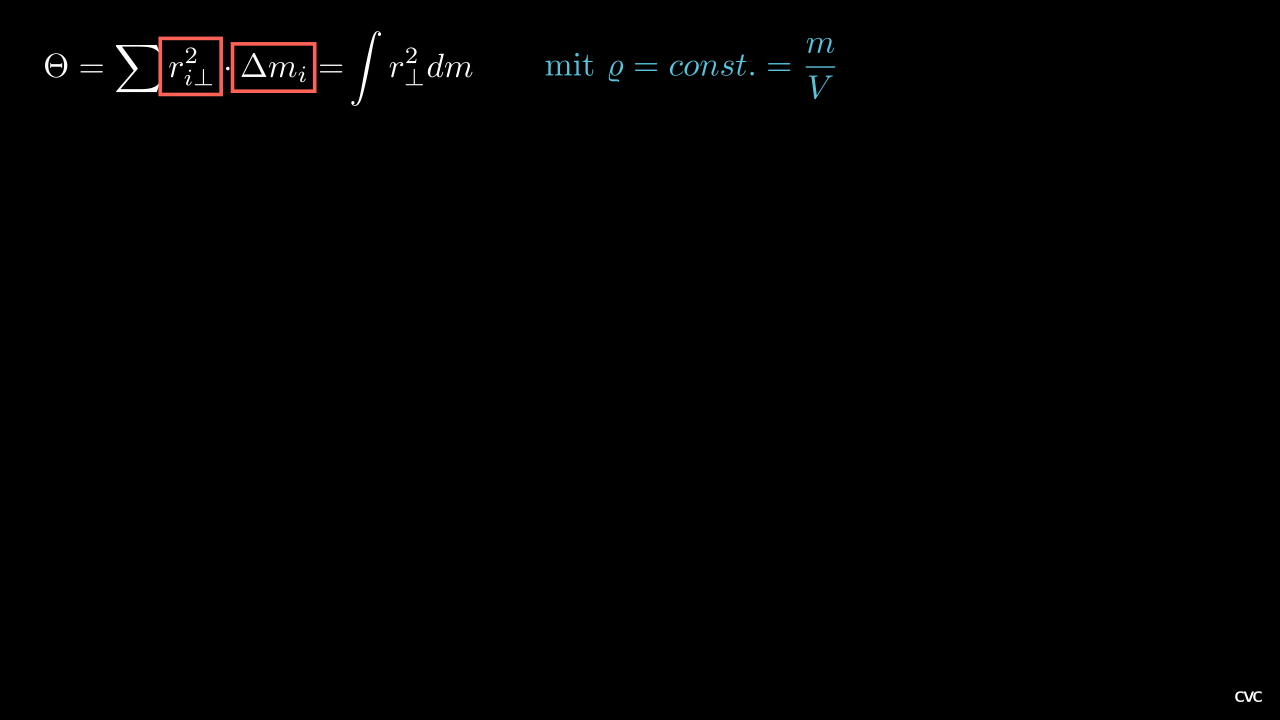

In [33]:
%%capture_video --path "animations/moment_of_inertia/moment_of_inertia.mp4"
%%manim -qm --fps 20 $video_scene

class moi_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # Equations
        moi_eq0 = MathTex(r'\Theta=\sum r_{i\perp}^2\cdot\Delta m_i=', font_size = 36).align_on_border(UP + LEFT, buff = 0.5)
        moi_eq1 = MathTex(r'\int r_{\perp}^2 dm', font_size = 36).next_to(moi_eq0, RIGHT, buff = 0.1)
        moi_eq2 = MathTex(r'\int_V r_{\perp}^2 dV', font_size = 36).next_to(moi_eq0, RIGHT, buff = 0.1)
        moi_eq3 = MathTex(r'\mathrm{mit}~\varrho=const.=\frac{m}{V}', font_size = 36, color = BLUE).next_to(moi_eq2, 3*RIGHT)     

        box_ri = SurroundingRectangle(moi_eq0[0][3:7], buff = .1, color = RED)
        box_Dm = SurroundingRectangle(moi_eq0[0][8:11], buff = .1, color = RED)

        Dm_eq = MathTex(r'\Delta m_i', color = RED, font_size = 32).move_to([-3.25, -0.1, 0])
        dm_eq = MathTex(r'dm', color = RED, font_size = 32).move_to([-3.25, -0.1, 0])
        dV_eq = MathTex(r'dV', color = BLUE, font_size = 32).move_to([-3.25, -0.1, 0])

        #self.add(index_labels(moi_eq0[0]))
        self.add(moi_eq0, moi_eq1)
        self.add(box_ri, box_Dm)
        self.add(moi_eq3)

In [42]:
import os

# os.system('ffmpeg -f concat -i moment_of_inertia_merge_list.txt -c copy moment_of_inertia_FULL_2.mp4')

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

256